In [2]:
# Import necessary packages
import requests
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [29]:
#create list of genres
list_of_genres = ['fantasy', 'action', 'crime', 'drama', 'Sci-Fi', 'adventure', 'comedy', 'thriller', 'musical', 'western', 'romance', 'war', 'horror', 'sport', 'history', 'family']
# create a dictionare with genre as key and a conflict grade as a value
violence_grades = {'fantasy':3, 'action':7, 'crime':9, 'drama':4, 'Sci-Fi':8, 'adventure':7, 'comedy':4, 'thriller':7, 'musical':4, 'western':8, 'romance':3, 'war':10, 'horror':10, 'sport':4, 'history':6, 'family':3}
#turn dictionary into a data frame
violence_grades_df = pd.DataFrame(violence_grades.items(), columns=['Genres', 'Grade'])
violence_grades_df = pd.DataFrame(violence_grades.items(), columns=['Genres', 'Genre_grade'])
#set genres column as index
violence_grades_df.set_index('Genres')

,Genre_grade
Genres,
fantasy,3
action,7
crime,9
drama,4
Sci-Fi,8
adventure,7
comedy,4
thriller,7
musical,4


In [30]:
#function that will pull all the genres information from IMDB url (advanced search)
def get_IMDB_genres(url):
    rg = requests.get(url)
#Use Beautiful Soup to get html soup 
    soup = BeautifulSoup(rg.text, 'html.parser')
#pull movie containers
    movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
#use for loop to get genre info from containers
    genre_array = []
    for container in movie_containers:
        genres = container.find('span', class_ ='genre')
        if genres:
            genre_array.append(genres.text.strip())
        else:
            genre_array.append('None')
    return genre_array


In [31]:
#function that will get the violence grade for a year
def get_IMDB_genre_popularity(year):
#when you use advanced search on IMDB with the same criterias only the year is different in the url 
    url = 'https://www.imdb.com/search/title/?title_type=feature&release_date='+str(year)+'-01-01,'+str(year)+'-12-31&user_rating=5.0,10.0&countries=us&sort=moviemeter,desc&count=250'
    f = get_IMDB_genres(url)
#use a for loop to get genre counts for each genre type
    action_count = 0
    for item in f:
        if 'Action' in item:
            action_count += 1
    comedy_count = 0
    for item in f:
        if 'Comedy' in item:
            comedy_count += 1 
    adventure_count = 0
    for item in f:
        if 'Adventure' in item:
            adventure_count += 1
    drama_count = 0
    for item in f:
        if 'Drama' in item:
            drama_count += 1
    romance_count = 0
    for item in f:
        if 'Romance' in item:
            romance_count += 1  
    western_count = 0
    for item in f:
        if 'Western' in item:
            western_count += 1
    thriller_count = 0
    for item in f:
        if 'Thriller' in item:
            thriller_count += 1
    horror_count = 0
    for item in f:
        if 'Horror' in item:
            horror_count += 1
    crime_count = 0
    for item in f:
        if 'Crime' in item:
            crime_count += 1
    scifi_count = 0
    for item in f:
        if 'Sci' in item:
            scifi_count += 1
    family_count = 0
    for item in f:
        if 'Family' in item:
            family_count += 1
    history_count = 0
    for item in f:
        if 'History' in item:
            history_count += 1
    war_count = 0
    for item in f:
        if 'War' in item:
            war_count += 1
    fantasy_count = 0
    for item in f:
        if 'Fantasy' in item:
            fantasy_count += 1
    sport_count = 0
    for item in f:
        if 'Sport' in item:
            sport_count += 1
    musical_count = 0
    for item in f:
        if 'Musical' in item:
            musical_count += 1
#create a dictionary with genre and genre count as key and value.
    genre_counts = {'fantasy':fantasy_count,
                    'action':action_count,
                    'crime':crime_count,
                    'drama':drama_count,
                    'Sci-Fi':scifi_count,
                    'adventure':adventure_count,
                    'comedy':comedy_count,
                    'thriller':thriller_count,
                    'musical':musical_count,
                    'western':western_count,
                    'romance':romance_count,
                    'war':war_count,
                    'horror':horror_count,
                    'sport':sport_count,
                    'history':history_count,
                    'family':family_count }
#turn dictionary into a data frame
    df_to_plot = pd.DataFrame(genre_counts.items(), columns=['Genres', 'Genre_count'])
#add a year column
    years = [year]*len(df_to_plot)
    df_to_plot['year'] = years
#left join the genre grade data frame with the genre count data frame on the genres column.
    Zeitgeist_df = violence_grades_df.join(df_to_plot.set_index('Genres'), on='Genres')
#Create a column year_violence_grade by multiplying the genre grade with the genre count
    Zeitgeist_df['year_violence_grade'] = Zeitgeist_df['Genre_grade']*Zeitgeist_df['Genre_count']
#delete genre grade and genre count columns
    del Zeitgeist_df['Genre_grade']
    del Zeitgeist_df['Genre_count']
    return Zeitgeist_df
#get_IMDB_genre_popularity(1950)

In [41]:
#for loop and concat to give you a data frame for a period of time
pieces = []
for year in [*range(1997,2009,1)]:
    df= get_IMDB_genre_popularity(year)
    pieces.append(df)
df_all = pd.concat(pieces)


In [42]:
#set genres column as index
df_all.set_index('Genres')
df_all

,Genres,year,year_violence_grade
0,fantasy,1997,15
1,action,1997,105
2,crime,1997,72
3,drama,1997,324
4,Sci-Fi,1997,64
...,...,...,...
11,war,2008,20
12,horror,2008,360
13,sport,2008,4
14,history,2008,12


In [43]:
#if you add up all the grades for a year you will get one grade for the year
#group data frame by year and add up violence year grade for a year.  
grouped = df_all.groupby(['year'])['year_violence_grade'].sum()
#store grouped df as a csv
grouped.to_csv('Zeitgeist_1997_2009.csv', index=year, header = True)
#years = [*range(1950,2020,1)]

In [3]:
df_Zeitgeist_grouped = pd.read_csv('Zeitgeist_1997_2009.csv')
df_Zeitgeist_grouped.head()

,year,year_violence_grade
0,1997,1227
1,1998,1174
2,1999,1193
3,2000,1249
4,2001,1329


In [45]:
#create a dictionary of events and add is as a new column to our grouped data frame
events_dict = {1950: 'The Korean_War', 1955:'The Vietnam_War', 1989:'The Fall of Berlin Wall', 1992:'The Fall of USSR', 2001:'9_11 and The Afganistan War', 2007:'The Great Recession'}
events_df = pd.DataFrame(events_dict.items(), columns=['year', 'events'])
events_df.set_index('year')
# Join the the 2 Dataframes on 'Genres' column and replace NANs with mean value.
df_Zeitgeist_final = df_Zeitgeist_grouped.join(events_df.set_index('year'), on='year')
df_Zeitgeist_final

,year,year_violence_grade,events
0,1997,1227,NaN
1,1998,1174,NaN
2,1999,1193,NaN
3,2000,1249,NaN
4,2001,1329,9_11 and The Afganistan War
5,2002,1462,NaN
6,2003,1650,NaN
7,2004,1618,NaN
8,2005,1511,NaN
9,2006,1424,NaN


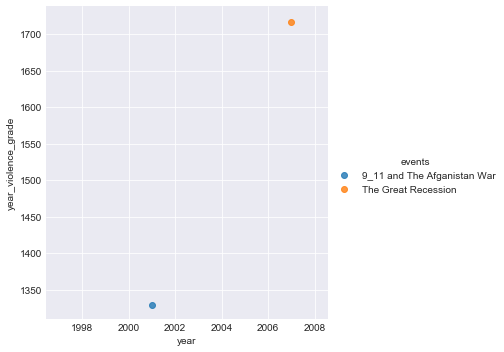

In [46]:
sns.lmplot(x='year', y='year_violence_grade',data = df_Zeitgeist_final, fit_reg=False, hue='events')

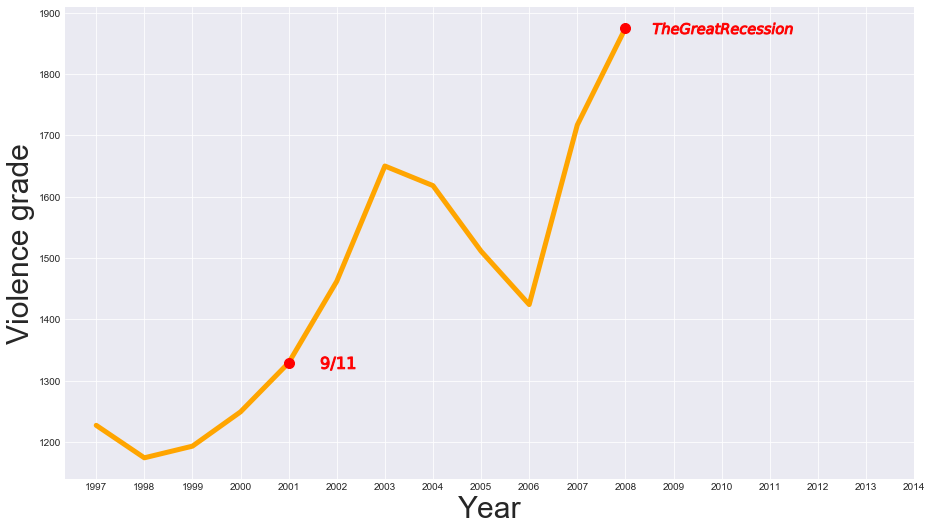

In [47]:
#plot genre evolution adding markers for the events in the event dictionary
fig = plt.figure(figsize=(70,40))
ax = plt.subplot(1,1,1)
plt.style.use('seaborn-darkgrid')
ax1= plt.subplot(4,4,1)
ax1.plot(df_Zeitgeist_grouped['year'], df_Zeitgeist_grouped['year_violence_grade'], color = 'orange', linestyle = '-', linewidth=5)
symbol4= '9/11'
ax1.plot(2002, 1329,'ro', markersize = 35, marker = r"$ {} $".format(symbol4))
ax1.plot(2001, 1329,'ro', markersize = 10, marker = 'o')
symbol5='The Great Recession'
ax1.plot(2010, 1875,'ro', markersize = 140, marker = r"$ {} $".format(symbol5))
ax1.plot(2008, 1875,'ro', markersize = 10, marker = 'o')
plt.xlabel("", fontsize=30)
plt.ylabel("", fontsize=30)
ax1.set_xlabel('Year')
ax1.set_ylabel('Violence grade')
xticks = [*range(1997,2015,1)]
plt.xticks(xticks); #Adding a semicolon after the call will prevent extraneous input from being displayed
